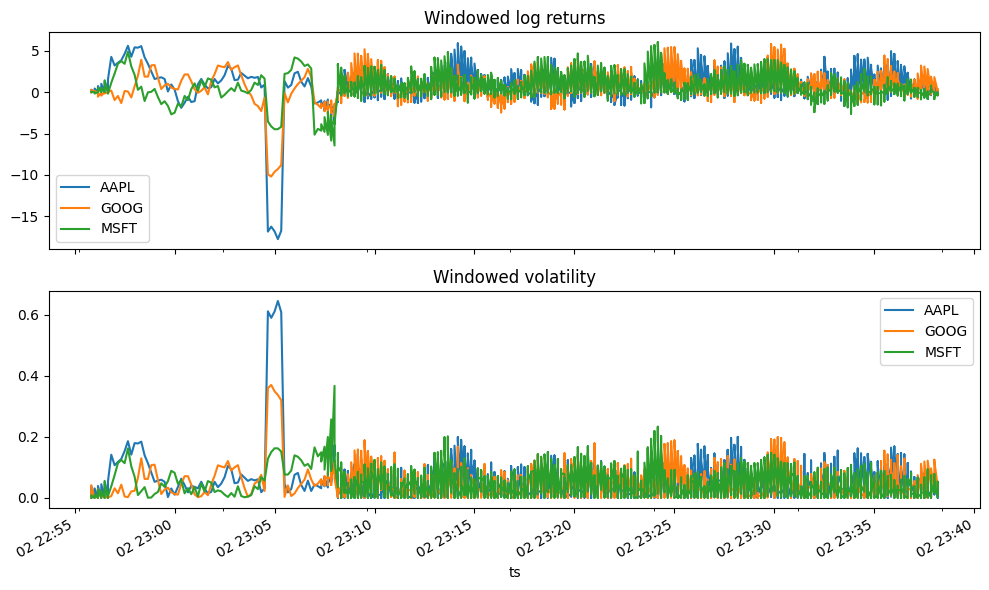

In [3]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

con = duckdb.connect('../data/pipeline.duckdb')
df = con.execute("""
select symbol, window_end as ts, log_return, volatility, num_ticks
from features
order by ts
""").df()

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
for sym, g in df.groupby('symbol'):
    g.plot(x='ts', y='log_return', ax=ax[0], label=sym)
    g.plot(x='ts', y='volatility', ax=ax[1], label=sym)
ax[0].set_title('Windowed log returns')
ax[1].set_title('Windowed volatility')
plt.tight_layout()
plt.show()
